<a href="https://colab.research.google.com/github/ulee-6/HeatMaptest1/blob/main/RM5Temporary_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download Packages


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import requests
import matplotlib.image as mpimg
from io import BytesIO
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
pip uninstall PyDrive

Found existing installation: PyDrive 1.3.1
Uninstalling PyDrive-1.3.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/PyDrive-1.3.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/pydrive/*
Proceed (Y/n)? y
  Successfully uninstalled PyDrive-1.3.1


In [ ]:
pip install PyDrive2

In [ ]:
pip show PyDrive2

Name: PyDrive2
Version: 1.6.3
Summary: Google Drive API made easy. Maintained fork of PyDrive.
Home-page: https://github.com/iterative/PyDrive2
Author: JunYoung Gwak
Author-email: jgwak@dreamylab.com
License: Apache License 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: google-api-python-client, oauth2client, pyOpenSSL, PyYAML, six
Required-by: 


Figure saved to: https://drive.google.com/file/d/1170RZGMydgF_tBkpy52ssg-LMi2r-1Dp/view?usp=drivesdk


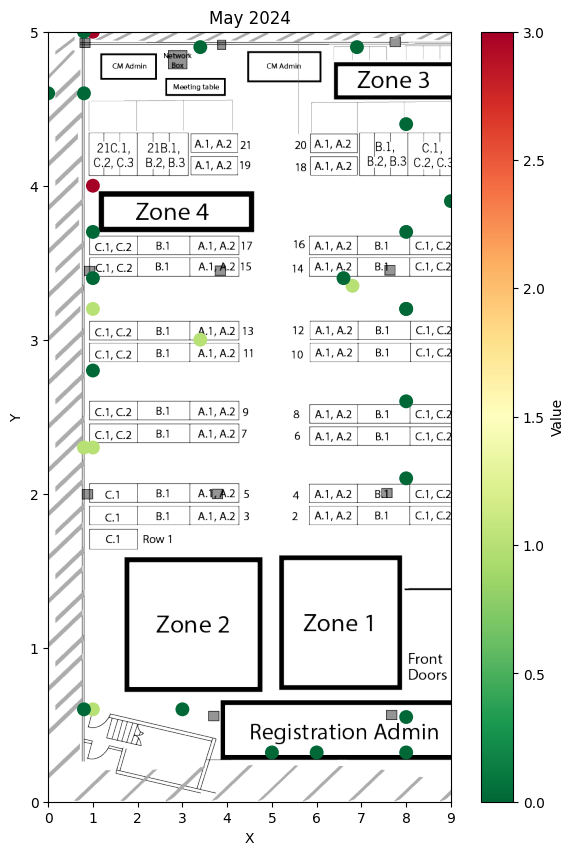

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import requests
import matplotlib.image as mpimg
from io import BytesIO
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Given data
new_data = {
    'Location': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41],
    'Value': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
}

# Manually chosen coordinates forming a rectangular shape
arbitrary_coordinates = {
    'X': [4, 3.4, 6.9, 8, 8, 8, 6.8, 6.6, 8, 8, 8, 8, 8, 6, 5, 3, 1, 1, 1, 1, 3.4, 1, 1, 1, 0.8, 0.8, 9, 1, 0, 0.8, 10, 10, 0.8],
    'Y': [4.7, 4.9, 4.9, 4.4, 3.7, 3.2, 3.35, 3.4, 3.2, 2.6, 2.1, 0.55, 0.32, 0.32, 0.32, 0.6, 0.6, 5, 4, 3.2, 3, 3.4, 2.3, 2.8, 2.3, 0.6, 3.9, 3.7, 4.6, 4.6, 2, 0, 5]
}

# Create a DataFrame with arbitrary coordinates
df_arbitrary = pd.DataFrame(arbitrary_coordinates)

# Merge the arbitrary coordinates with the given data
df_combined = pd.merge(df_arbitrary, pd.DataFrame(new_data), left_index=True, right_on='Location')

def plot_heatmap_with_background(image_url):
    # Set the aspect ratio to make the plot longer vertically
    plt.figure(figsize=(6, 10))  # Adjust the width and height as needed

    # Normalize values for colormap
    norm = plt.Normalize(df_combined['Value'].min(), df_combined['Value'].max())

    # Create a scatter plot without Gaussian blur
    scatter = plt.scatter(df_combined['X'], df_combined['Y'], c=df_combined['Value'], cmap='RdYlGn_r', s=100, norm=norm, marker='o', edgecolors='none')

    # Set x-axis limits to 0-9
    plt.xlim(0, 9)

    # Load and display the background image from GitHub
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    img_array = mpimg.pil_to_array(img)
    plt.imshow(img_array, extent=(df_combined['X'].min(), df_combined['X'].max(), df_combined['Y'].min(), df_combined['Y'].max()), aspect='auto', alpha=.01)

    # Customize the plot as needed
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('May 2024')

    # Get the current axes
    ax = plt.gca()
    ax.imshow(img_array, extent=(df_combined['X'].min(), df_combined['X'].max(), df_combined['Y'].min(), df_combined['Y'].max()), aspect='auto', alpha=1.0)

    # Create a divider for the existing axes instance
    divider = make_axes_locatable(ax)

    # Append axes below the current axes, with 10% height of the original axes
    cax = divider.append_axes("right", size="8%", pad=0.3)

    # Add colorbar with RdYlGn_r color scheme
    cbar = plt.colorbar(scatter, cax=cax, orientation='vertical', label='Value', cmap='RdYlGn_r')

    # Adjust the figure size to make it longer in height
    plt.gcf().set_size_inches(6, 10)

    # Save the figure to Google Drive
    save_figure_to_drive(plt, "heatmap_with_background")

    # Show the plot with color bar
    plt.show()

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

def save_figure_to_drive(plt, file_name):
    # Save the figure locally
    file_path = f"{file_name}.png"
    plt.savefig(file_path)

    # Upload the file to Google Drive
    uploaded = drive.CreateFile({'title': file_name})
    uploaded.SetContentFile(file_path)
    uploaded.Upload()

    # Print the link to the uploaded file
    print(f"Figure saved to: {uploaded['alternateLink']}")

# Example usage with the GitHub image URL
github_image_url = 'https://github.com/ulee-6/HeatMaptest1/blob/main/Rm5%20Heat%20Map%20PNG.png?raw=true'
plot_heatmap_with_background(github_image_url)


Figure saved to: https://drive.google.com/file/d/1XTxqolbNgpIWRhalp5W0-Ehjub576xeT/view?usp=drivesdk


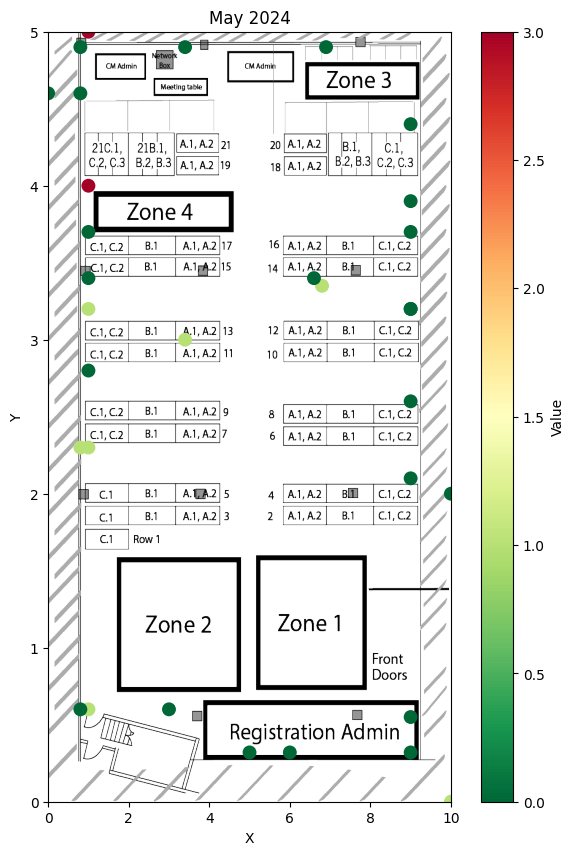

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import requests
import matplotlib.image as mpimg
from io import BytesIO
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Given data
new_data = {
    'Location': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41],
    'Value': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
}

# Manually chosen coordinates forming a rectangular shape
arbitrary_coordinates = {
    'X': [4, 3.4, 6.9, 9, 9, 9, 6.8, 6.6, 9, 9, 9, 9, 9, 6, 5, 3, 1, 1, 1, 1, 3.4, 1, 1, 1, 0.8, 0.8, 9, 1, 0, 0.8, 10, 10, 0.8],
    'Y': [4.7, 4.9, 4.9, 4.4, 3.7, 3.2, 3.35, 3.4, 3.2, 2.6, 2.1, 0.55, 0.32, 0.32, 0.32, 0.6, 0.6, 5, 4, 3.2, 3, 3.4, 2.3, 2.8, 2.3, 0.6, 3.9, 3.7, 4.6, 4.6, 2, 0, 4.9]
}

# Create a DataFrame with arbitrary coordinates
df_arbitrary = pd.DataFrame(arbitrary_coordinates)

# Merge the arbitrary coordinates with the given data
df_combined = pd.merge(df_arbitrary, pd.DataFrame(new_data), left_index=True, right_on='Location')

def plot_heatmap_with_background(image_url):
    # Set the aspect ratio to make the plot longer vertically
    plt.figure(figsize=(6, 10))  # Adjust the width and height as needed

    # Normalize values for colormap
    norm = plt.Normalize(df_combined['Value'].min(), df_combined['Value'].max())

    # Create a scatter plot without Gaussian blur
    scatter = plt.scatter(df_combined['X'], df_combined['Y'], c=df_combined['Value'], cmap='RdYlGn_r', s=100, norm=norm, marker='o', edgecolors='none')

    # Load and display the background image from GitHub
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    img_array = mpimg.pil_to_array(img)

    # Set the extent of the image to match the data range
    x_min, x_max = df_combined['X'].min(), df_combined['X'].max()
    y_min, y_max = df_combined['Y'].min(), df_combined['Y'].max()
    plt.imshow(img_array, extent=(x_min, x_max, y_min, y_max), aspect='auto', alpha=0.5)

    # Customize the plot as needed
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('May 2024')

    # Get the current axes
    ax = plt.gca()
    ax.imshow(img_array, extent=(x_min, x_max, y_min, y_max), aspect='auto', alpha=1.0)

    # Create a divider for the existing axes instance
    divider = make_axes_locatable(ax)

    # Append axes below the current axes, with 10% height of the original axes
    cax = divider.append_axes("right", size="8%", pad=0.3)

    # Add colorbar with RdYlGn_r color scheme
    cbar = plt.colorbar(scatter, cax=cax, orientation='vertical', label='Value', cmap='RdYlGn_r')

    # Adjust the figure size to make it longer in height
    plt.gcf().set_size_inches(6, 10)

    # Save the figure to Google Drive
    save_figure_to_drive(plt, "heatmap_with_background")

    # Show the plot with color bar
    plt.show()

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

def save_figure_to_drive(plt, file_name):
    # Save the figure locally
    file_path = f"{file_name}.png"
    plt.savefig(file_path)

    # Upload the file to Google Drive
    uploaded = drive.CreateFile({'title': file_name})
    uploaded.SetContentFile(file_path)
    uploaded.Upload()

    # Print the link to the uploaded file
    print(f"Figure saved to: {uploaded['alternateLink']}")

# Example usage with the GitHub image URL
github_image_url = 'https://github.com/ulee-6/HeatMaptest1/blob/main/Rm5%20Heat%20Map%20PNG.png?raw=true'
plot_heatmap_with_background(github_image_url)


AttributeError: 'Colorbar' object has no attribute 'set_clim'

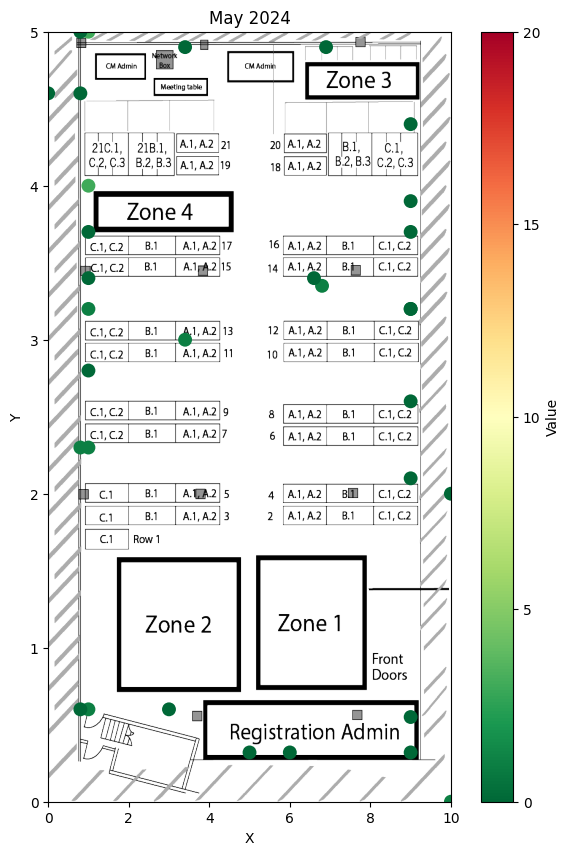

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import requests
import matplotlib.image as mpimg
from io import BytesIO
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Given data
new_data = {
    'Location': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41],
    'Value': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
}

# Manually chosen coordinates forming a rectangular shape
arbitrary_coordinates = {
    'X': [4, 3.4, 6.9, 9, 9, 9, 6.8, 6.6, 9, 9, 9, 9, 9, 6, 5, 3, 1, 1, 1, 1, 3.4, 1, 1, 1, 0.8, 0.8, 9, 1, 0, 0.8, 10, 10, 0.8],
    'Y': [4.7, 4.9, 4.9, 4.4, 3.7, 3.2, 3.35, 3.4, 3.2, 2.6, 2.1, 0.55, 0.32, 0.32, 0.32, 0.6, 0.6, 5, 4, 3.2, 3, 3.4, 2.3, 2.8, 2.3, 0.6, 3.9, 3.7, 4.6, 4.6, 2, 0, 5]
}

# Create a DataFrame with arbitrary coordinates
df_arbitrary = pd.DataFrame(arbitrary_coordinates)

# Merge the arbitrary coordinates with the given data
df_combined = pd.merge(df_arbitrary, pd.DataFrame(new_data), left_index=True, right_on='Location')

def plot_heatmap_with_background(image_url):
    # Set the aspect ratio to make the plot longer vertically
    plt.figure(figsize=(6, 10))  # Adjust the width and height as needed

    # Normalize values for colormap with vmin=0 and vmax=20
    norm = plt.Normalize(vmin=0, vmax=20)

    # Create a scatter plot without Gaussian blur
    scatter = plt.scatter(df_combined['X'], df_combined['Y'], c=df_combined['Value'], cmap='RdYlGn_r', s=100, norm=norm, marker='o', edgecolors='none')

    # Load and display the background image from GitHub
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    img_array = mpimg.pil_to_array(img)

    # Set the extent of the image to match the data range
    x_min, x_max = df_combined['X'].min(), df_combined['X'].max()
    y_min, y_max = df_combined['Y'].min(), df_combined['Y'].max()
    plt.imshow(img_array, extent=(x_min, x_max, y_min, y_max), aspect='auto', alpha=0.5)

    # Customize the plot as needed
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('May 2024')

    # Get the current axes
    ax = plt.gca()
    ax.imshow(img_array, extent=(x_min, x_max, y_min, y_max), aspect='auto', alpha=1.0)

    # Create a divider for the existing axes instance
    divider = make_axes_locatable(ax)

    # Append axes below the current axes, with 10% height of the original axes
    cax = divider.append_axes("right", size="8%", pad=0.3)

    # Add colorbar with RdYlGn_r color scheme
    cbar = plt.colorbar(scatter, cax=cax, orientation='vertical', label='Value', cmap='RdYlGn_r')

    # Adjust the ticks and limits of the colorbar
    cbar.set_ticks([0, 5, 10, 15, 20])
    cbar.set_clim(0, 20)

    # Adjust the figure size to make it longer in height
    plt.gcf().set_size_inches(6, 10)

    # Save the figure to Google Drive
    save_figure_to_drive(plt, "heatmap_with_background")

    # Show the plot with color bar
    plt.show()

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

def save_figure_to_drive(plt, file_name):
    # Save the figure locally
    file_path = f"{file_name}.png"
    plt.savefig(file_path)

    # Upload the file to Google Drive
    uploaded = drive.CreateFile({'title': file_name})
    uploaded.SetContentFile(file_path)
    uploaded.Upload()

    # Print the link to the uploaded file
    print(f"Figure saved to: {uploaded['alternateLink']}")

# Example usage with the GitHub image URL
github_image_url = 'https://github.com/ulee-6/HeatMaptest1/blob/main/Rm5%20Heat%20Map%20PNG.png?raw=true'
plot_heatmap_with_background(github_image_url)


Figure saved to: https://drive.google.com/file/d/1n-AOUhcXLodz5DosHpy5TxJPgmWGa9yb/view?usp=drivesdk


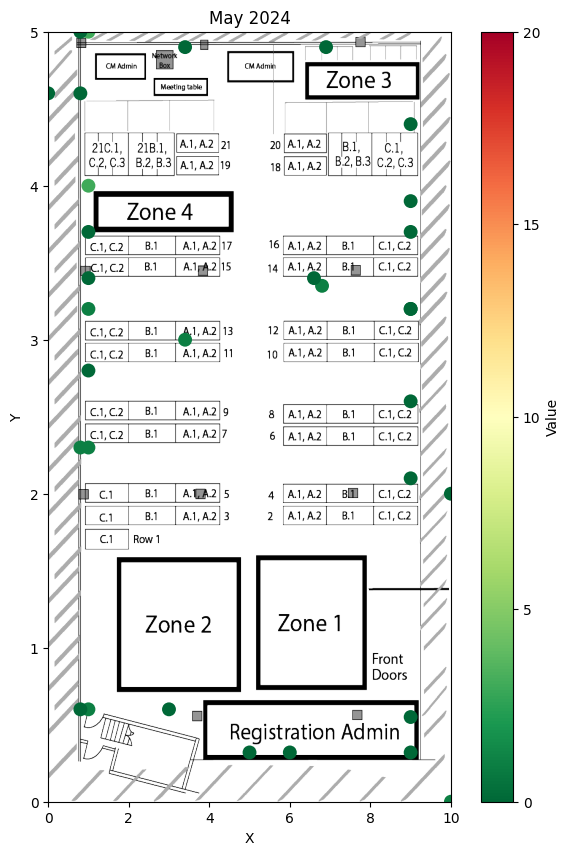

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import requests
import matplotlib.image as mpimg
from io import BytesIO
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Given data
new_data = {
    'Location': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41],
    'Value': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
}

# Manually chosen coordinates forming a rectangular shape
arbitrary_coordinates = {
    'X': [4, 3.4, 6.9, 9, 9, 9, 6.8, 6.6, 9, 9, 9, 9, 9, 6, 5, 3, 1, 1, 1, 1, 3.4, 1, 1, 1, 0.8, 0.8, 9, 1, 0, 0.8, 10, 10, 0.8],
    'Y': [4.7, 4.9, 4.9, 4.4, 3.7, 3.2, 3.35, 3.4, 3.2, 2.6, 2.1, 0.55, 0.32, 0.32, 0.32, 0.6, 0.6, 5, 4, 3.2, 3, 3.4, 2.3, 2.8, 2.3, 0.6, 3.9, 3.7, 4.6, 4.6, 2, 0, 5]
}

# Create a DataFrame with arbitrary coordinates
df_arbitrary = pd.DataFrame(arbitrary_coordinates)

# Merge the arbitrary coordinates with the given data
df_combined = pd.merge(df_arbitrary, pd.DataFrame(new_data), left_index=True, right_on='Location')

def plot_heatmap_with_background(image_url):
    # Set the aspect ratio to make the plot longer vertically
    plt.figure(figsize=(6, 10))  # Adjust the width and height as needed

    # Normalize values for colormap with vmin=0 and vmax=20
    norm = plt.Normalize(vmin=0, vmax=20)

    # Create a scatter plot without Gaussian blur
    scatter = plt.scatter(df_combined['X'], df_combined['Y'], c=df_combined['Value'], cmap='RdYlGn_r', s=100, norm=norm, marker='o', edgecolors='none')

    # Load and display the background image from GitHub
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    img_array = mpimg.pil_to_array(img)

    # Set the extent of the image to match the data range
    x_min, x_max = df_combined['X'].min(), df_combined['X'].max()
    y_min, y_max = df_combined['Y'].min(), df_combined['Y'].max()
    plt.imshow(img_array, extent=(x_min, x_max, y_min, y_max), aspect='auto', alpha=0.5)

    # Customize the plot as needed
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('May 2024')

    # Get the current axes
    ax = plt.gca()
    ax.imshow(img_array, extent=(x_min, x_max, y_min, y_max), aspect='auto', alpha=1.0)

    # Create a divider for the existing axes instance
    divider = make_axes_locatable(ax)

    # Append axes below the current axes, with 10% height of the original axes
    cax = divider.append_axes("right", size="8%", pad=0.3)

    # Add colorbar with RdYlGn_r color scheme
    cbar = plt.colorbar(scatter, cax=cax, orientation='vertical', label='Value', cmap='RdYlGn_r')

    # Adjust the ticks of the colorbar
    cbar.set_ticks([0, 5, 10, 15, 20])

    # Adjust the figure size to make it longer in height
    plt.gcf().set_size_inches(6, 10)

    # Save the figure to Google Drive
    save_figure_to_drive(plt, "heatmap_with_background")

    # Show the plot with color bar
    plt.show()

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

def save_figure_to_drive(plt, file_name):
    # Save the figure locally
    file_path = f"{file_name}.png"
    plt.savefig(file_path)

    # Upload the file to Google Drive
    uploaded = drive.CreateFile({'title': file_name})
    uploaded.SetContentFile(file_path)
    uploaded.Upload()

    # Print the link to the uploaded file
    print(f"Figure saved to: {uploaded['alternateLink']}")

# Example usage with the GitHub image URL
github_image_url = 'https://github.com/ulee-6/HeatMaptest1/blob/main/Rm5%20Heat%20Map%20PNG.png?raw=true'
plot_heatmap_with_background(github_image_url)
